<h1> CASA Jupyter Notebook Tutorial </h1>

Here I am presenting an example of a CASA jupyter notebook as a tutorial of how to process EVN data. For explanation on how to download data please refer to the read me on the github https://github.com/jwpetley/CASA-Jupyter-Tutorial. You can either have raw FITS IDI files at this point or a CASA measurement set. Following the instructions below will allow you to convert the former to the latter if you need.

---

If you would like to follow along with me I am using experiment 'EC067C'.

<h2> Variable Set Up to Save Typing in The Future </h2>

The following cell cets up paths correctly and allows you to create variables for all your file names so that they are easier to use. 

In [1]:
import glob
import shutil

#Removes unnecassary warnings around plots
%matplotlib inline

obsid = 'eg025'

mypath='/home/jupyter/data/'
sys.path.append(mypath)

#Visibility data
idifiles = sorted(glob.glob(mypath+'eg025*.IDI*'))
vis = mypath+obsid+'.ms'

print 'As cross-check for the path show which IDI files are used:'
print idifiles

#EVN archival calibration tables
AIPSflag = mypath+obsid+'.uvflg'
gcfile = mypath+'EVN.gc'
antabfile = mypath+obsid+'.antab'

#CASA calibration tables
gcaltab = mypath+obsid+'.gcal'
tsystab = mypath+obsid+'.tsys'
sbdtab = mypath+obsid+'.sbd'
mbdtab = mypath+obsid+'.mbd'
bpasstab = mypath+obsid+'.bpass'
flagtab = mypath+obsid+'.flag'

listobsfile = mypath+obsid+'.listobs'

As cross-check for the path show which IDI files are used:
['/home/jupyter/data/eg025_1_1.IDI1']


<h2> Steps to create your CASA MS </h2> 

The following section takes you through the steps to create a CASA MS using your data set. If these files already exist we can check for them to make sure we are not overwriting. 

<h3> Append system temperatures </h3>

Firstly we append the system temperatures needed to do VLBI calibration, go and make a coffee or something

In [2]:
# Local imports 
import astropy.io.fits as pyfits
from casavlbitools import fitsidi

# Check if the IDI files have a TSYS column, if not, add one
try:
    hdulist = pyfits.open(idifiles[0])
    hdu = hdulist['SYSTEM_TEMPERATURE']
    print 'TSYS table already present, skipping the append step'
except KeyError:
    print 'Appending TSYS, time to relax for a while'
    fitsidi.append_tsys(antabfile, idifiles)    



TSYS table already present, skipping the append step


<h3> Automatic Flagging </h3> 

We extract flagging information from the AIPSFlag file for use with casa

In [3]:
from casavlbitools import fitsidi
fitsidi.convert_flags(AIPSflag,idifiles,outfile=flagtab)

<h3> Gain curve </h3> 

Now we extract the gain curve from the antab file that we will use for calibration later

In [4]:
from casavlbitools import casa as mdconvert
if os.path.isdir(gcfile)==False:
    mdconvert.convert_gaincurve(antabfile,gcfile)
else:
    print "GC conversion already done."

<h3> Import FITS </h3> 

Finally we import the FITS IDI files into CASA to convert them to an MS. Importantly they will know have a system temperature column appended to them. If you already have the MS we clear any calibration or flags so that you start this notebook with a totally clean measurement set.

Then we use the previous flag file we created and flag manager to show the state of the initial flagging before any flagging in calibration occurs. 

In [5]:
if os.path.isdir(vis)==False:
    importfitsidi(fitsidifile= idifiles, vis = vis, constobsid=True, scanreindexgap_s=15.0, specframe='GEO')
else:
    print "Import already done"
    #clearcal(vis)
    #flagmanager(vis=vis,mode='restore',versionname='no_flags')

Show log 2020-11-07 03:20:13	INFO	importfitsidi::::	
 2020-11-07 03:20:13	INFO	importfitsidi::::+	##########################################
 2020-11-07 03:20:13	INFO	importfitsidi::::+	##### Begin Task: importfitsidi #####
 2020-11-07 03:20:13	INFO	importfitsidi::::	importfitsidi(fitsidifile=['/home/jupyter/data/eg025_1_1.IDI1'],vis="/home/jupyter/data/eg025.ms",constobsid=True,scanreindexgap_s=15.0,specframe="GEO")
 2020-11-07 03:20:13	INFO	importfitsidi::::	
 2020-11-07 03:20:13	INFO	importfitsidi::::	### Reading file /home/jupyter/data/eg025_1_1.IDI1
 2020-11-07 03:20:13	INFO	FitsIDItoMS()::readFitsFile	Found binary table ARRAY_GEOMETRY
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable	number of antennas = 8
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable	array ref pos = [0, 0, 0]
 2020-11-07 03:20:15	WARN	FitsIDItoMS::fillAntennaTable	ARRAY_GEOMETRY input table does not contain dish DIAMETER column.
 2020-11-07 03:20:15	WARN	FitsIDItoMS::fillAntennaTable+ Will assume default diameter for TELESCOPE EVN which is 0 m.
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable antenna_no 1 -> antenna ID 0
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 2 -> antenna ID 1
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 3 -> antenna ID 2
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 4 -> antenna ID 3
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 5 -> antenna ID 4
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 6 -> antenna ID 5
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 7 -> antenna ID 6
 2020-11-07 03:20:15	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 8 -> antenna ID 7
 2020-11-07 03:20:16	INFO	FitsIDItoMS()::readFitsFile	Found binary table FREQUENCY
 2020-11-07 03:20:17	INFO	FitsIDItoMS()::readFitsFile	Found binary table SOURCE
 2020-11-07 03:20:19	INFO	FitsIDItoMS()::readFitsFile	Found binary table ANTENNA
 2020-11-07 03:20:22	INFO	FitsIDItoMS()::readFitsFile	Note: this ANTENNA table uses double precision for TIME_INTERVAL. Convention is single.
 2020-11-07 03:20:22	INFO	FitsIDItoMS()::readFitsFile	Found binary table UV_DATA
 2020-11-07 03:20:24	INFO	FITSUtil::fromFITSHeader Reading and writing visibility data
 2020-11-07 03:23:19	INFO	FitsIDItoMS()::readFitsFile	Found binary table SYSTEM_TEMPERATURE
 2020-11-07 03:30:07	INFO	MSFitsIDI::readFITSFile() Subtables found: [ARRAY_GEOMETRY, FREQUENCY, SOURCE, ANTENNA, SYSTEM_TEMPERATURE]
 2020-11-07 03:30:10	INFO	importfitsidi::::	Setting observation ID of all integrations to 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 1 at 4529363419.25, field 3, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 2 at 4529363555.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 3 at 4529363643.25, field 0, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 4 at 4529363823.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 5 at 4529363915.25, field 0, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 6 at 4529364095.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 7 at 4529364183.25, field 0, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 8 at 4529364363.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 9 at 4529364455.25, field 0, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 10 at 4529364635.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 11 at 4529364811.25, field 3, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 12 at 4529365055.25, field 1, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan 13 at 4529365143.25, field 0, array_id 0
 2020-11-07 03:30:21	INFO	importfitsidi::::	Starting new scan

In [6]:
flagdata(vis=vis, mode='list', inpfile=flagtab,
         reason='any', action='apply', flagbackup=True, savepars=False)
flagmanager(vis=vis,mode='rename',oldname='flagdata_1',versionname='no_flags',
        comment='Flags prior to any calibration or flagging step')

Show log 2020-11-07 03:30:25	INFO	flagdata::::	
 2020-11-07 03:30:25	INFO	flagdata::::+	##########################################
 2020-11-07 03:30:25	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-07 03:30:25	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/eg025.ms",mode="list",autocorr=False,inpfile="/home/jupyter/data/eg025.flag",reason="any",
 2020-11-07 03:30:25	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2020-11-07 03:30:25	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2020-11-07 03:30:25	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-07 03:30:25	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-07 03:30:25	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-07 03:30:25	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-07 03:30:25	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-07 03:30:25	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-07 03:30:25	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-07 03:30:25	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-07 03:30:25	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-07 03:30:25	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-07 03:30:25	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-07 03:30:25	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-07 03:30:25	INFO	flagdata::::+ writeflags=True)
 2020-11-07 03:30:25	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-07 03:30:25	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-07 03:30:26	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-07 03:30:32	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-07 03:30:33	INFO	flagdata::::	List mode is active
 2020-11-07 03:30:33	INFO	flagdata::::	Read 1862 command(s) from file: /home/jupyter/data/eg025.flag
 2020-11-07 03:30:33	INFO	flagdata::::	Selected 1862 commands from combined input list(s) 
 2020-11-07 03:30:34	INFO	flagdata::::	Reduced 1862 timerange flags into 8 compound flags
 2020-11-07 03:30:34	INFO	flagdata::::	Initializing the agents
 2020-11-07 03:30:34	INFO	AgentFlagger::initAgents	There are 8 valid agents in list
 2020-11-07 03:30:34	INFO	flagdata::::	Running the agentflagger tool
 2020-11-07 03:30:36	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-07 03:30:36	INFO	FlagMSHandler::	Chunk = 1 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 3 (0234+285), Spw = 0, Channels = 16, Corrs = [ RR RL LR LL ], Total Rows = 693
 2020-11-07 03:30:36	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-07 03:30:36	INFO	FlagMSHandler::	Chunk = 2 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 3 (0234+285), Spw = 1, Channels = 16, Corrs = [ RR RL LR LL ], Total Rows = 693
 2020-11-07 03:30:36	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-07 03:30:36	INFO	FlagMSHandler::	Chunk = 3 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 3 (0234+285), Spw = 2, Channels = 16, Corrs = [ RR RL LR LL ], Total Rows = 693
 2020-11-07 03:30:36	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-

<h2> Time to Play with the Measurement Set! </h2>

The first thing you should do with any data set is to list the observations and get an idea of what you have. I picked this experiment pretty much at random so it would be a good idea to have a look at what's inside. `listobs` is used to list the key attributes of the measurement set and we can save them to a file. 

In [7]:
listobs(vis, listfile=listobsfile, overwrite=True)

           MeasurementSet Name:  /home/jupyter/data/eg025.ms      MS Version 2
   Observer: JIVE     Project: JIVE  
Observation: EVN
Data records: 813596       Total elapsed time = 39580 seconds
   Observed from   29-May-2002/04:30:17.2   to   29-May-2002/15:29:57.2 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  29-May-2002/04:30:17.2 - 04:32:29.2     1      3 0234+285                  2772  [0,1,2,3]  [4, 4, 4, 4] 
              04:32:33.3 - 04:33:57.3     2      1 J0232+2628                1764  [0,1,2,3]  [4, 4, 4, 4] 
              04:34:01.2 - 04:36:57.3     3      0 3C67                      3696  [0,1,2,3]  [4, 4, 4, 4] 
              04:37:01.2 - 04:38:29.3     4      1 J0232+2628                1848  [0,1,2,3]  [4, 4, 4, 4] 
              04:38:33.3 - 04:41:29.3     5      0 3C67                      3696  [0,1,2,3]  [4, 4, 4, 4] 
              04:4

True

Show log 2020-11-07 03:31:15	INFO	listobs::::	
 2020-11-07 03:31:15	INFO	listobs::::+	##########################################
 2020-11-07 03:31:15	INFO	listobs::::+	##### Begin Task: listobs #####
 2020-11-07 03:31:15	INFO	listobs::::	listobs(vis="/home/jupyter/data/eg025.ms",selectdata=True,spw="",field="",antenna="",
 2020-11-07 03:31:15	INFO	listobs::::+ uvrange="",timerange="",correlation="",scan="",intent="",
 2020-11-07 03:31:15	INFO	listobs::::+ feed="",array="",observation="",verbose=True,listfile="/home/jupyter/data/eg025.listobs",
 2020-11-07 03:31:15	INFO	listobs::::+ listunfl=False,cachesize=50,overwrite=True)
 2020-11-07 03:31:16	INFO	listobs::ms::summary	Writing output to file: /home/jupyter/data/eg025.listobs
 2020-11-07 03:31:16	INFO	listobs::MSMetaData::_computeScanAndSubScanProperties Computing scan and subscan properties...
 2020-11-07 03:31:17	INFO	listobs::::	##### End Task: listobs #####
 2020-11-07 03:31:17	INFO	listobs::::+	##########################################

As you can see we observed three different fields were observed as you can see by the field names. We have 8 spectral windows with a width of 500kHz. 14 antennas were used and the positions of all of them are given. Feel free to look through the listobs file in your own time and see what you can find. 

Let's have a look at where these antennas are located visually. We can do this using the `plotants` task. Wouldn't it be really cool if they could actually place some sort of mapping API under this (long shot request). 

We should now choose the reference antenna too. Looking at the plot below we see the main cluster. EF is in the centre and has great sensitivity so we will use this as the reference, this will probabaly be applicable to your data too if using EVN. 

Number of points being plotted: 8


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


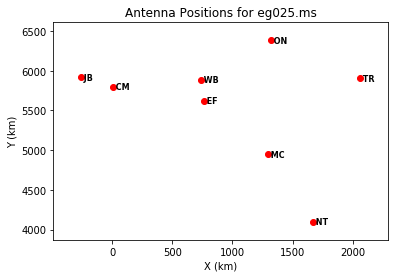

Show log 2020-11-07 03:31:31	INFO	plotants::::	
 2020-11-07 03:31:31	INFO	plotants::::+	##########################################
 2020-11-07 03:31:31	INFO	plotants::::+	##### Begin Task: plotants #####
 2020-11-07 03:31:31	INFO	plotants::::	plotants(vis="/home/jupyter/data/eg025.ms",figfile="",antindex=False,logpos=False,exclude="",
 2020-11-07 03:31:31	INFO	plotants::::+ checkbaselines=False,title="",showgui=True)
 2020-11-07 03:31:32	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on /home/jupyter/data/eg025.ms...
 2020-11-07 03:31:32	INFO	plotants::::	Number of points being plotted: 8
 2020-11-07 03:31:32	INFO	plotants::::	##### End Task: plotants #####
 2020-11-07 03:31:32	INFO	plotants::::+	##########################################

In [8]:
plotants(vis)
refant = 'EF'

<h2> A Priori Calibration </h2>

Now we want to use our Tsys and Gain Curve information to apply some calibration to the data. We can use `gencal` to generate different types of calibration table and then use `applycal` to apply them to the measurement set.

Let's start by plotting the data now just to see what it looks like without calibration. We also need to choose what scan we are interested in looking at. The target for this experiment was 'LSPMJ0036' so we should pick a scan involving that. Let's use scan 27 but you can choose your own. 

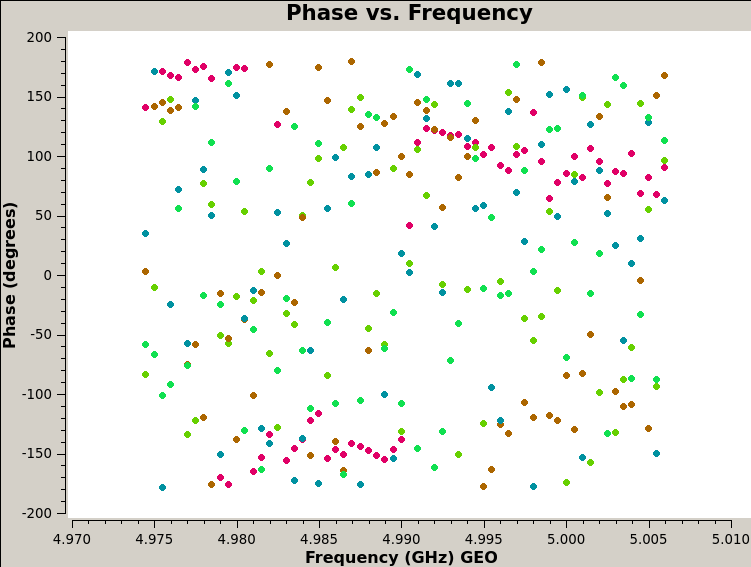

True

Show log 2020-11-07 03:44:23	INFO	plotms::::	
 2020-11-07 03:44:23	INFO	plotms::::+	##########################################
 2020-11-07 03:44:23	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-07 03:44:23	INFO	plotms::::	plotms(vis="/home/jupyter/data/eg025.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-07 03:44:23	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-07 03:44:23	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2020-11-07 03:44:23	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-07 03:44:23	INFO	plotms::::+ antenna="EF",scan="27",correlation="ll",array="",observation="",
 2020-11-07 03:44:23	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-07 03:44:23	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-07 03:44:23	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-07 03:44:23	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-07 03:44:23	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-07 03:44:23	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-07 03:44:23	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-07 03:44:23	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-07 03:44:23	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-07 03:44:23	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-07 03:44:23	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-07 03:44:23	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-07 03:44:23	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-07 03:44:23	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-07 03:44:23	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-07 03:44:23	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-07 03:44:23	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-07 03:44:23	INFO	PlotMS::load_cache	START Current memory usage: 5925.36 kilobytes.
 2020-11-07 03:44:23	INFO	PlotMS::load_cache	Plotting table eg025.ms
 2020-11-07 03:44:23	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 27, corr: ll
 2020-11-07 03:44:23	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-07 03:44:23	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-07 03:44:23	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-07 03:44:23	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Frequency(6)...
 2020-11-07 03:44:24	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-07 03:44:28	INFO	PlotMS::load_cache	Data selection will yield a total of 320 plottable points (flagged and unflagged).
 2020-11-07 03:44:28	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 3.056e-06 GB of memory (9.55 bytes/point).
 2020-11-07 03:44:28	INFO	PlotMS::load_cache+	This is 0.000150127% of the memory avail. to CASA (2.0356 GB).
 2020-11-07 03:44:29	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-07 03:44:31	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-07 03:44:31	INFO	PlotMS::load_cache	refTime = 2002/05/29/00:00:00.0
 2020-11-07 03:44:31	INFO	PlotMS::load_cache	Finished loading.


In [19]:
sbdscan = '27'

plotms(vis=vis, xaxis='frequency', yaxis='phase',
    antenna=refant, correlation='ll',coloraxis='baseline',scan = sbdscan, 
   averagedata=True, avgtime='600')

In [15]:
if os.path.isdir(tsystab)==True:
    shutil.rmtree(tsystab)

gencal(vis,caltable=tsystab,caltype='tsys',uniform=False)

Show log 2020-11-07 03:36:07	INFO	gencal::::	
 2020-11-07 03:36:07	INFO	gencal::::+	##########################################
 2020-11-07 03:36:07	INFO	gencal::::+	##### Begin Task: gencal #####
 2020-11-07 03:36:07	INFO	gencal::::	gencal(vis="/home/jupyter/data/eg025.ms",caltable="/home/jupyter/data/eg025.tsys",caltype="tsys",infile="",spw="",
 2020-11-07 03:36:07	INFO	gencal::::+ antenna="",pol="",parameter=[],uniform=False)
 2020-11-07 03:36:07	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-07 03:36:07	INFO	calibrater::open	Opening MS: /home/jupyter/data/eg025.ms for calibration.
 2020-11-07 03:36:07	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-07 03:36:07	INFO	calibrater::specifycal	Beginning specifycal-----------------------
 2020-11-07 03:36:08	INFO Creating B TSYS table from MS SYSCAL subtable.
 2020-11-07 03:37:44	INFO Tsys spectra counts per spw for antenna Ids 0-7 (per pol):
 2020-11-07 03:37:44	INFO Spw 0: [1745, 2588, 2260, 959, 2419, 2080, 2257, 146] (=14454 spectra; 1 chans per spectra, per pol)
 2020-11-07 03:37:44	INFO Spw 1: [1745, 2588, 2260, 959, 2419, 2080, 2257, 146] (=14454 spectra; 1 chans per spectra, per pol)
 2020-11-07 03:37:44	INFO Spw 2: [1745, 2588, 2260, 959, 2419, 2080, 2257, 146] (=14454 spectra; 1 chans per spectra, per pol)
 2020-11-07 03:37:44	INFO Spw 3: [1745, 2588, 2260, 959, 2419, 2080, 2257, 146] (=14454 spectra; 1 chans per spectra, per pol)
 2020-11-07 03:37:44	INFO Writing solutions to table: /home/jupyter/data/eg025.tsys
 2020-11-07 03:38:01	INFO	gencal::::	##### End Task: gencal #####
 2020-11-07 03:38:01	INFO	gencal::::+	##########################################

In [16]:
if os.path.isdir(gcaltab)==True:
    shutil.rmtree(gcaltab)

gencal(vis,caltable=gcaltab,caltype='gc',infile=gcfile)

Show log 2020-11-07 03:38:01	INFO	gencal::::	
 2020-11-07 03:38:01	INFO	gencal::::+	##########################################
 2020-11-07 03:38:01	INFO	gencal::::+	##### Begin Task: gencal #####
 2020-11-07 03:38:01	INFO	gencal::::	gencal(vis="/home/jupyter/data/eg025.ms",caltable="/home/jupyter/data/eg025.gcal",caltype="gc",infile="/home/jupyter/data/EVN.gc",spw="",
 2020-11-07 03:38:01	INFO	gencal::::+ antenna="",pol="",parameter=[],uniform=True)
 2020-11-07 03:38:01	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-07 03:38:01	INFO	calibrater::open	Opening MS: /home/jupyter/data/eg025.ms for calibration.
 2020-11-07 03:38:01	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-07 03:38:01	INFO	calibrater::specifycal	Beginning specifycal-----------------------
 2020-11-07 03:38:01	INFO Using user-specified gaincurve table: /home/jupyter/data/EVN.gc
 2020-11-07 03:38:02	INFO Using /home/jupyter/data/EVN.gc nrow=9
 2020-11-07 03:38:02	INFO Writing solutions to table: /home/jupyter/data/eg025.gcal
 2020-11-07 03:38:03	INFO	gencal::::	##### End Task: gencal #####
 2020-11-07 03:38:03	INFO	gencal::::+	##########################################

In [17]:
applycal(vis=vis,gaintable=[tsystab,gcaltab], flagbackup=False, parang=True)

Show log 2020-11-07 03:38:03	INFO	applycal::::	
 2020-11-07 03:38:03	INFO	applycal::::+	##########################################
 2020-11-07 03:38:03	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-11-07 03:38:03	INFO	applycal::::	applycal(vis="/home/jupyter/data/eg025.ms",field="",spw="",intent="",selectdata=True,
 2020-11-07 03:38:03	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-11-07 03:38:03	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['/home/jupyter/data/eg025.tsys', '/home/jupyter/data/eg025.gcal'],gainfield=[],
 2020-11-07 03:38:03	INFO	applycal::::+ interp=[],spwmap=[],calwt=[True],parang=True,applymode="",
 2020-11-07 03:38:03	INFO	applycal::::+ flagbackup=False)
 2020-11-07 03:38:03	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-07 03:38:03	INFO	applycal::calibrater::open	Opening MS: /home/jupyter/data/eg025.ms for calibration.
 2020-11-07 03:38:04	INFO	applycal::VisSetUtil::addScrCols	Adding CORRECTED_DATA column(s).
 2020-11-07 03:38:18	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-07 03:38:18	INFO	applycal::calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-07 03:38:18	INFO	applycal::calibrater::reset	Reseting solve/apply state
 2020-11-07 03:38:18	INFO	applycal::Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-07 03:38:18	INFO	applycal::Calibrater::selectvis	Selection did not drop any rows
 2020-11-07 03:38:18	INFO	applycal::Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-07 03:38:18	INFO	applycal::calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-07 03:38:18	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-07 03:38:18	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-07 03:38:20	INFO	applycal::Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/eg025.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-07 03:38:20	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-07 03:38:20	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-07 03:38:21	INFO	applycal::Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/eg025.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-07 03:38:21	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-07 03:38:21	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-07 03:38:21	INFO	applycal::Calibrater::setapply(type, applypar)	. P Jones 
 2020-11-07 03:38:21	INFO	applycal::calibrater::correct	Beginning correct---------------------------
 2020-11-07 03:38:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2020-11-07 03:38:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. B TSYS: table=/home/jupyter/data/eg025.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-07 03:38:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. P Jones 
 2020-11-07 03:38:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. EGainCurve: table=/home/jupyter/data/eg025.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-07 03:38:22	INFO	applycal::Calibrater::correct2 (VI2/VB2)	Found valid WEIGHT_SPECTRUM, correcting it.
 2020-11-07 03:38:22	WARN	applycal::CTPatchedInterp::interpolate	In caltable eg025.tsys (B TSYS):
 2020-11-07 03:38:22	WARN	applycal::CTPatchedInterp::interpolate+ Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
 2020-11-07 03:38:22	WARN	applycal::CTPatchedInterp::interpolate+ of calibration for MS spw=0; using NEAREST instead.
 2020-11-07 03:38:22	SEVERE	applycal::MeasTable::dUTC(Double) (file /usr/local/casa/casaco

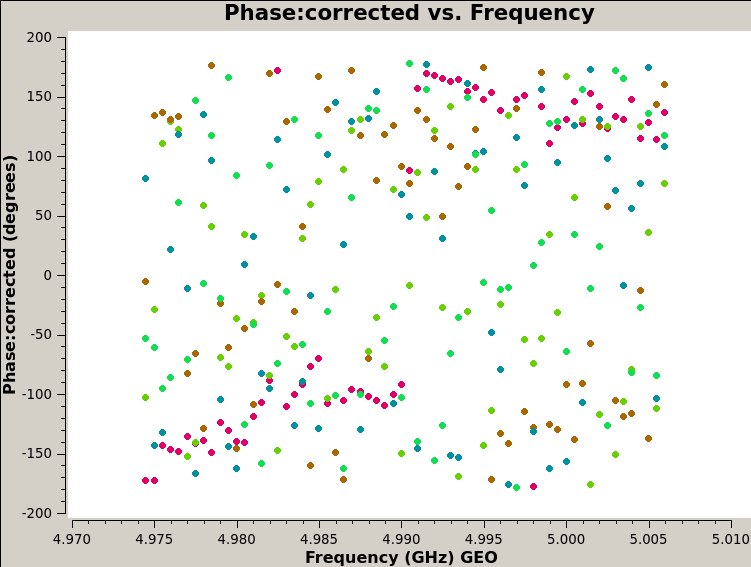

True

Show log 2020-11-07 03:44:42	INFO	plotms::::	
 2020-11-07 03:44:42	INFO	plotms::::+	##########################################
 2020-11-07 03:44:42	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-07 03:44:42	INFO	plotms::::	plotms(vis="/home/jupyter/data/eg025.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-07 03:44:42	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-07 03:44:42	INFO	plotms::::+ yaxis="phase",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-07 03:44:42	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-07 03:44:42	INFO	plotms::::+ antenna="EF",scan="27",correlation="ll",array="",observation="",
 2020-11-07 03:44:42	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-07 03:44:42	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-07 03:44:42	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-07 03:44:42	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-07 03:44:42	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-07 03:44:42	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-07 03:44:42	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-07 03:44:42	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-07 03:44:42	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-07 03:44:42	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-07 03:44:42	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-07 03:44:42	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-07 03:44:42	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-07 03:44:42	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-07 03:44:42	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-07 03:44:42	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-07 03:44:42	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-07 03:44:42	INFO	PlotMS::load_cache	START Current memory usage: 5937.73 kilobytes.
 2020-11-07 03:44:42	INFO	PlotMS::load_cache	Plotting table eg025.ms
 2020-11-07 03:44:42	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 27, corr: ll
 2020-11-07 03:44:42	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-07 03:44:42	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-07 03:44:42	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-07 03:44:42	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):corrected vs. Frequency(6)...
 2020-11-07 03:44:43	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-07 03:44:47	INFO	PlotMS::load_cache	Data selection will yield a total of 320 plottable points (flagged and unflagged).
 2020-11-07 03:44:47	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 3.056e-06 GB of memory (9.55 bytes/point).
 2020-11-07 03:44:47	INFO	PlotMS::load_cache+	This is 0.000150127% of the memory avail. to CASA (2.0356 GB).
 2020-11-07 03:44:47	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-07 03:44:48	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-07 03:44:48	INFO	PlotMS::load_cache	refTime = 2002/05/29/00:00:00.0
 2020-11-07 03:44:48	INFO	PlotMS::load_cache	Fini

In [20]:
plotms(vis=vis, xaxis='frequency', yaxis='phase', ydatacolumn='corrected', 
    antenna=refant, correlation='ll',coloraxis='baseline',scan = sbdscan, 
   averagedata=True, avgtime='600')